# Linear Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as pt
from sklearn import linear_model
import pandas as pd
import math
import http, requests, io
%matplotlib inline

all required libraries are imported.We need linear_model to get LinearRegression().

In [2]:
def csv2df(url):
    try:
        data = pd.read_csv(url)
    except http.client.IncompleteRead as e:
        r = requests.get(url, timeout=10)
        b = io.StringIO(r.text)
        data = pd.read_csv(b)
    assert data.shape[0] > 0, "empty csv"
    return data

data = csv2df('https://raw.githubusercontent.com/HSE-LaMBDA/MLatURL2019/master/day2/house-train.csv')

We load the data into variables;which are in the form of dataframes.

In [3]:
train_set=data #.dropna()

We used dropna() to remove the rows containing NaN values and now we have dataframes having valid values all together.

In [4]:
features = ['GrLivArea',]


In [5]:

X=train_set[features].as_matrix()
Y=train_set[['SalePrice']].as_matrix()
print('mean of X is',np.mean(X),'\n')
print('median of X is',np.median(X),'\n')

print('mean of Y is',np.mean(Y),'\n')
print('median of Y is',np.median(Y),'\n')

#Xtest=test_set[['x']].as_matrix()
#Ytest=test_set[['y']].as_matrix()

mean of X is 1515.46369863 

median of X is 1464.0 

mean of Y is 180921.19589 

median of Y is 163000.0 



We convert our dataframes to matrices and we can find out mean and median of the matrices so to get an idea of the skewness of the data.Check the mean and median of both data sets; X and Y to find out if data is skewed.
Since the mean~median, we can assume that the data is non-skewed and we have a symmetric distribution!!!

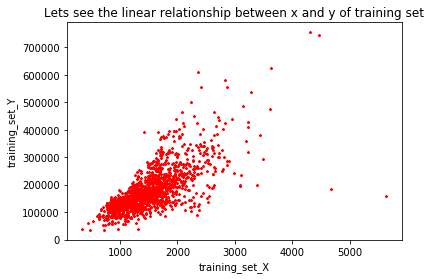

In [6]:

pt.title('Lets see the linear relationship between x and y of training set')
pt.scatter(X,Y,s=5,c='red',marker='*')
pt.xlabel('training_set_X')
pt.ylabel('training_set_Y')
pt.show()

We plot a graph between training values to get the idea of the linear relationship between X and Y.


In [7]:
lm=linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let us calculate the coefficient of determination and correlation coefficient to get the measures the association between 2 var(correlation coeff.) and the extent to which dependent variables can be predicted from the indpndnt var(coeff of determination.)

In [8]:
print('Coeff of determination:',lm.score(X,Y))
print('correlation is:',math.sqrt(lm.score(X,Y)))

Coeff of determination: 0.502148650272
correlation is: 0.7086244776126522


Higher values denote a strong association and strong dependency.

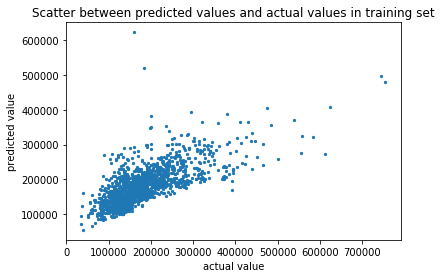

In [9]:
p=lm.predict(X)
pt.title('Scatter between predicted values and actual values in training set')
pt.scatter(Y,p,s=5)
pt.xlabel('actual value')
pt.ylabel('predicted value')
pt.show()

In [10]:
test = csv2df('https://raw.githubusercontent.com/HSE-LaMBDA/MLatURL2019/master/day2/house-test.csv')

In [11]:
Xtest=test[features].as_matrix()

In [12]:
pr=lm.predict(Xtest)

In [13]:
submission = pd.DataFrame(data=pr, columns=['SalePrice'], index=test['Id'])

In [14]:
submission.to_csv("submission.csv")